In [1]:
#project 2 : IPL Data Analysis 
# created by Muthukumaran RP
# Note this module is quiet interesting as the same requirement will be excuted using the pandas module and pandasai module
# Number of issues faced during installations: python supported version is python3.11 
# Libraries to be installed numpy, yaml, pandas, pandasai 
import pandas as pd 
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI
url = 'https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/IPLsquad23.csv?raw=true'
ipldata = pd.read_csv(url)
ipldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       568 non-null    int64  
 1   Player's List    568 non-null    object 
 2   Base Price       568 non-null    object 
 3   TYPE             568 non-null    object 
 4   COST IN ₹ (CR.)  243 non-null    float64
 5   Cost IN $ (000)  243 non-null    float64
 6   2022 Squad       230 non-null    object 
 7   Team             568 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.6+ KB


In [2]:
#project :: IPL Data Analysis 
#----------------------------
# Import the DataSet
#import pandas as pd
#url = 'https://github.com/muthukumaranrprepo/DataAnalyst-Python/blob/main/DataFiles/IPLsquad23.csv?raw=true'
#ipldata = pd.read_csv(url)
#ipldata.info()

In [3]:
#First step is to clean the data set

#ipldata_drop = ipldata.drop(columns=['Unnamed: 0'])
if 'Unnamed: 0' in ipldata.columns:
    ipldata = ipldata.drop(columns=['Unnamed: 0'])  # 
# Rename the columns to make them more readable
ipldata = ipldata.rename(columns={"Player's List" : "Player_Name", 
                                 "COST IN ₹ (CR.)": "COST_IN_CR_INR",
                                 "Cost IN $ (000)" : "Cost IN USD"})
#set playe name as index
ipldata = ipldata.set_index('Player_Name')

ipldata.head()

,Base Price,TYPE,COST_IN_CR_INR,Cost IN USD,2022 Squad,Team
Player_Name,,,,,,
Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,Gujarat Titans
Joshua Little,5000000,BOWLER,4.4,528.0,NaN,Gujarat Titans
Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,Gujarat Titans
K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,Gujarat Titans
Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,Gujarat Titans


In [4]:
#Analysis 1: Which players are the most costliest buys?

maxplayer_cost = ipldata['COST_IN_CR_INR'].max()
#maxplayer_cost 

player_name = ipldata.loc[(ipldata['COST_IN_CR_INR'] == maxplayer_cost)]
#print('player:::',player_name)

print("The most costliest player is",player_name,"with a cost of",maxplayer_cost,"crores.")

The most costliest player is             Base Price         TYPE  COST_IN_CR_INR  Cost IN USD 2022 Squad  \
Player_Name                                                                   
Sam Curran    20000000  ALL-ROUNDER            18.5       2220.0        NaN   

                           Team  
Player_Name                      
Sam Curran   Punjab Super Kings   with a cost of 18.5 crores.


In [5]:
#Analysis 2: Which players were the cheapest buys this season and which team bought them?
#Fetched list of players where the cost not less than 0 
minplayer_cost = ipldata.loc[ipldata['COST_IN_CR_INR'] != 0, 'COST_IN_CR_INR'].min()
minplayer_cost

#player_name = ipldata.loc[(ipldata['COST_IN_CR_INR'] == minplayer_cost),["Player_Name","COST_IN_CR_INR"]]
player_name = ipldata.loc[(ipldata['COST_IN_CR_INR'] == minplayer_cost),["COST_IN_CR_INR"]]
print('The number of cheaply bought players number is',player_name.size)
print("The most cheapest buys are",player_name,"with a cost of",minplayer_cost,"crores.")

The number of cheaply bought players number is 28
The most cheapest buys are                     COST_IN_CR_INR
Player_Name                       
Urvil Patel                    0.2
Bhagath Varma                  0.2
Ajay Mandal                    0.2
Shaik Rasheed                  0.2
Kulwant Khejroliya             0.2
Suyash Sharma                  0.2
Mohit Rathee                   0.2
Vidwath Kaverappa              0.2
Shivam Singh                   0.2
Swapnil Singh                  0.2
Yudhvir Charak                 0.2
Prerak Mankad                  0.2
Raghav Goyal                   0.2
Shams Mulani                   0.2
Nehal Wadhera                  0.2
Vishnu Vinod                   0.2
Duan Jansen                    0.2
Manoj Bhandage                 0.2
Sonu Yadav                     0.2
Himanshu Sharma                0.2
Kunal Rathore                  0.2
Abdul P A                      0.2
Akash Vashisht                 0.2
Murugan Ashwin                 0.2
Nitish Kumar 

In [6]:
#Fetched list of players where the cost includes 0 as well
minplayer_cost = ipldata['COST_IN_CR_INR'].min()
minplayer_cost

#player_name = ipldata.loc[(ipldata['COST_IN_CR_INR'] == minplayer_cost),["Player_Name","COST_IN_CR_INR"]]
player_name = ipldata.loc[(ipldata['COST_IN_CR_INR'] == minplayer_cost),["COST_IN_CR_INR"]]
print('The number of cheaply bought players number is',player_name.size)
print("The most cheapest buys are",player_name,"with a cost of",minplayer_cost,"crores.")

The number of cheaply bought players number is 163
The most cheapest buys are                    COST_IN_CR_INR
Player_Name                      
Rahul Tewatia                 0.0
Pradeep Sangwan               0.0
Rashid Khan                   0.0
R. Sai Kishore                0.0
Yash Dayal                    0.0
...                           ...
Abdul Samad                   0.0
Abhishek Sharma               0.0
Aiden Markram                 0.0
Bhuvneshwar Kumar             0.0
Glenn Phillips                0.0

[163 rows x 1 columns] with a cost of 0.0 crores.


C:\Users\hp\AppData\Local\Temp\ipykernel_8232\2111404417.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='COST_IN_CR_INR',y='Team',data=ipldata,ci=None)


<Axes: xlabel='COST_IN_CR_INR', ylabel='Team'>

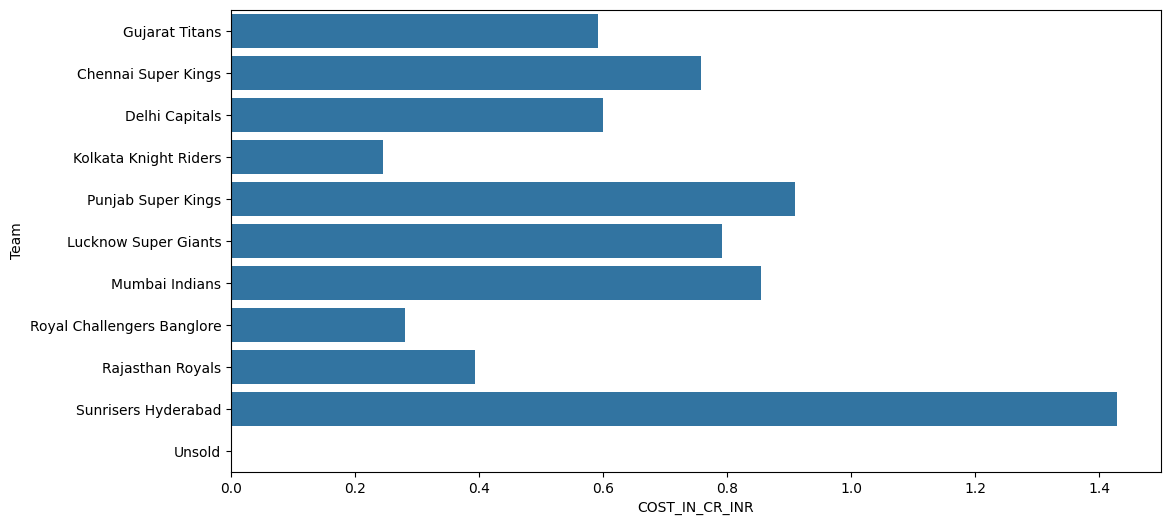

In [7]:
#Analysis 3:Draw a Bargraph showing How much money was spent by each team this season overall.

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='COST_IN_CR_INR',y='Team',data=ipldata,ci=None)

In [8]:
#Analysis 4:How many bowler remained unsold and what was their base price?

bowler_type = ipldata['TYPE'] == 'BOWLER'
bowler_team = ipldata['Team'] == 'Unsold'
bowler_unsold=ipldata.loc[(bowler_type & bowler_team),["Base Price"]]
print('The list of Players and base price who went UNSOLD ')
print(bowler_unsold)

The list of Players and base price who went UNSOLD 
                Base Price
Player_Name               
Chris Jordan      20000000
Adam Milne        20000000
Mujeeb Rahman     10000000
Tabraiz Shamsi    10000000
Lance Morris       3000000
...                    ...
Trilok Nag         2000000
Atal Bihari Rai    2000000
Ramon Simmonds     2000000
Rajeev Singh       2000000
Mohd. Wasim        2000000

[104 rows x 1 columns]


In [9]:
#Analysis 5:How many players remained unsold this season?
unsold_player = ipldata[ipldata['Team'] == 'Unsold']
print('The number of players who went UNSOLD this season is:',unsold_player.index.size)

The number of players who went UNSOLD this season is: 325


Which type of player majorly unsold ALL-ROUNDER 126


<Axes: xlabel='TYPE', ylabel='count'>

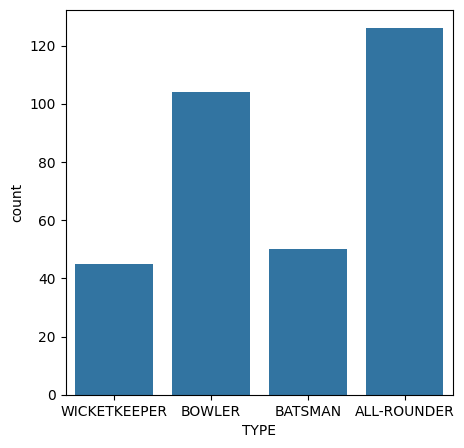

In [10]:
#Analysis 6: Which type of players were majorly unsold?
majorunsold = unsold_player['TYPE'].value_counts()
print('Which type of player majorly unsold',majorunsold.index[0],majorunsold[0])

#Above Requirement can be achieved using the seabord visualization
import seaborn as sns
#convert series to DF
unsold_df = pd.DataFrame(unsold_player['TYPE'])
plt.figure(figsize=(5,5))
sns.countplot(x=unsold_df['TYPE'])


In [11]:
#Analysis 7: Who are three new players Gujrat picked,?

New_GT = ipldata[(ipldata['Team'] == 'Gujarat Titans') 
             & (ipldata['2022 Squad'] != 'GT')
             & ipldata['2022 Squad'].isna()] # check the NaN as new players are not part of 2022 squad
player_list = New_GT.index

print('The three new players picked by Gujrat Titans are:')
for player in player_list:
    print(player)

The three new players picked by Gujrat Titans are:
Joshua Little
Mohit Sharma
Urvil Patel


In [12]:
#Analysis 8: What is total money spent by all teams in dollars?

# group by - not much readable
teams_spent = ipldata.groupby('Team')['Cost IN USD'].sum()
teams_spent

#or 
#pivot_table - more readable
teams_spent_pivot = ipldata.pivot_table(index='Team', values='Cost IN USD', aggfunc='sum')
teams_spent_pivot


,Cost IN USD
Team,
Chennai Super Kings,2274.0
Delhi Capitals,1800.0
Gujarat Titans,1776.0
Kolkata Knight Riders,648.0
Lucknow Super Giants,2376.0
Mumbai Indians,2460.0
Punjab Super Kings,2400.0
Rajasthan Royals,1182.0
Royal Challengers Banglore,840.0


<Axes: xlabel='Team', ylabel='COST_IN_CR_INR'>

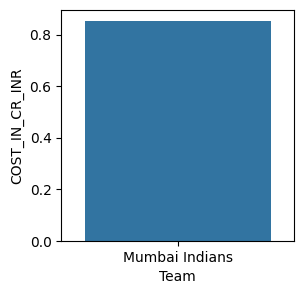

In [13]:
#Analysis 9: draw a barplot showing, how much money was spent by Mumbai Indians on all types of players
plt.figure(figsize=(3,3))
sns.barplot(x='Team',y='COST_IN_CR_INR',data=ipldata[ipldata['Team'] == 'Mumbai Indians'],errorbar=None)

<Axes: xlabel='TYPE', ylabel='COST_IN_CR_INR'>

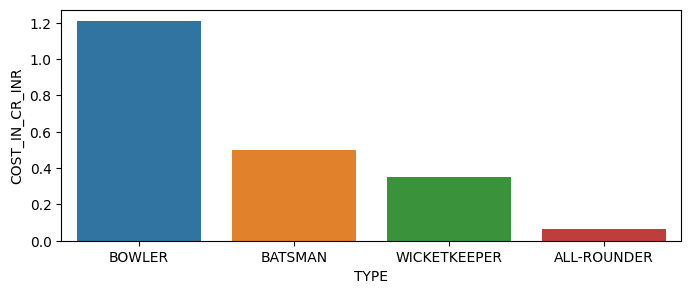

In [ ]:
#Analysis 10 : draw a barplot showing how much money was spent by Gujrat on all types of players?

plt.figure(figsize=(8,3))
sns.barplot(x='TYPE',y='COST_IN_CR_INR',data=ipldata[ipldata['Team'] == 'Gujarat Titans'],errorbar=None,hue='TYPE')